<a href="https://colab.research.google.com/github/Alicegaz/DLAssignments/blob/master/GenerativeModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import beta, norm, weibull_max, lognorm, gamma, pearson3

In [37]:
df = pd.read_csv("./sensors_missed_107.csv")

In [21]:
df.shape

(17362, 2)

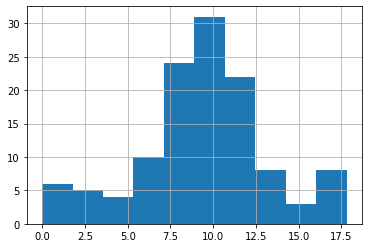

In [41]:
df.loc[12060:12180, 'T'].hist()

In [42]:
X = df.loc[12060:12180, 'T']

In [43]:
X.shape

(121,)

In [48]:
chi_square_statistics = []
# 11 equi-distant bins of observed Data 
percentile_bins = np.linspace(0,100,10)
percentile_cutoffs = np.percentile(X, percentile_bins)
observed_frequency, bins = (np.histogram(X, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

In [51]:
dist_names = ["weibull_min","norm","weibull_max","beta", "invgauss","uniform","gamma","expon", "lognorm","pearson3","triang"]

In [57]:
size = X.shape[0]

In [58]:
# Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(stats, distribution)
    param = dist.fit(X)
    print("{}\n{}\n".format(dist, param))


    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)

(0.6259182443337215, -3.943556080219698e-28, 3.163924356833893)

(9.285950413223139, 3.7899673080236798)

(3.0815300851747756, 20.10511097544419, 12.080348564159657)

(10647962.836366272, 45.65115207527079, -6040716.94790601, 6040752.130954104)

(0.026341772362513692, -16.168196735889794, 961.3485788814505)

(0.0, 17.8)



/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



(375.88597404659185, -65.0202386828312, 0.19770460737375622)

(0.0, 9.285950413223139)

(0.014523781226927768, -250.3776865314366, 259.6469671297991)

(-0.17043300075147333, 9.285927214258164, 3.7883617892513577)

(0.5956068667561367, -1.010193279726817, 19.493048052574444)



In [59]:
#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)

In [60]:
print ('\nDistributions listed by Betterment of fit:')
print ('............................................')
print (results)


Distributions listed by Betterment of fit:
............................................
   Distribution   chi_square
3          beta     3.836701
1          norm     6.614058
2   weibull_max     6.665107
8       lognorm     6.856604
6         gamma     8.112067
10       triang     9.345463
4      invgauss    21.834291
5       uniform    71.432429
7         expon   221.053891
0   weibull_min   858.449812
9      pearson3  2415.263495


In [73]:
x = np.linspace(X.min(), X.max(), X.shape[0])

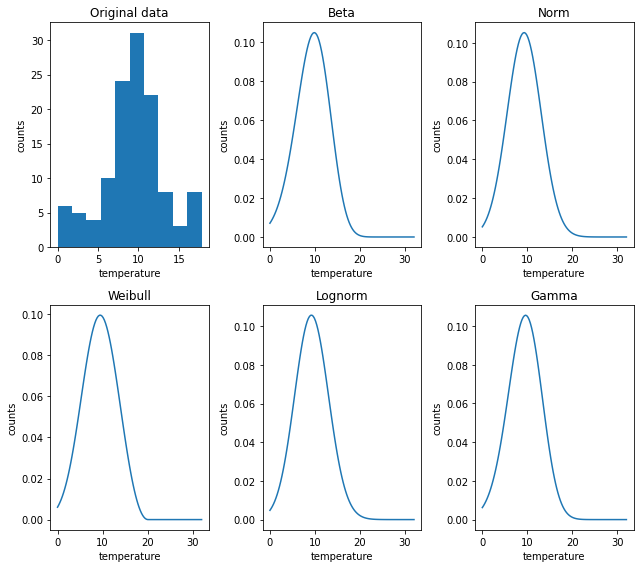

In [90]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 8))
# Histogram Plot of Observed Data
axes[0][0].hist(X)
axes[0][0].set_xlabel('temperature', fontsize=10)
axes[0][0].set_ylabel('counts', fontsize='medium') 
axes[0][0].set_title('Original data', fontsize=12) 
#Beta Distribution Fitting
axes[0][1].plot(x,beta.pdf(x,10647962.836366272, 45.65115207527079, -6040716.94790601, 6040752.130954104))
axes[0][1].set_xlabel('temperature', fontsize=10)
axes[0][1].set_ylabel('counts', fontsize='medium') 
axes[0][1].set_title('Beta', fontsize=12) 
#Normal Distribution Fitting
axes[0][2].plot(x,norm.pdf(x,9.285950413223139, 3.7899673080236798))
axes[0][2].set_xlabel('temperature', fontsize=10)
axes[0][2].set_ylabel('counts', fontsize='medium') 
axes[0][2].set_title('Norm', fontsize=12) 
axes[1][0].plot(x,weibull_max.pdf(x,3.0815300851747756, 20.10511097544419, 12.080348564159657))
axes[1][0].set_xlabel('temperature', fontsize=10)
axes[1][0].set_ylabel('counts', fontsize='medium') 
axes[1][0].set_title('Weibull', fontsize=12) 
axes[1][1].plot(x,lognorm.pdf(x,0.014523781226927768, -250.3776865314366, 259.6469671297995))
axes[1][1].set_xlabel('temperature', fontsize=10)
axes[1][1].set_ylabel('counts', fontsize='medium') 
axes[1][1].set_title('Lognorm', fontsize=12)
axes[1][2].plot(x,pearson3.pdf(x,-0.17043300075147333, 9.285927214258164, 3.7883617892513577))
axes[1][2].set_xlabel('temperature', fontsize=10)
axes[1][2].set_ylabel('counts', fontsize='medium') 
axes[1][2].set_title('Gamma', fontsize=12)
 
375.88597404659185, -65.0202386828312, 0.19770460737375622
fig.tight_layout()

In [100]:
beta_ = beta.rvs(10647962.836366272, 45.65115207527079, -6040716.94790601, 6040752.130954104, size=X.shape[0])

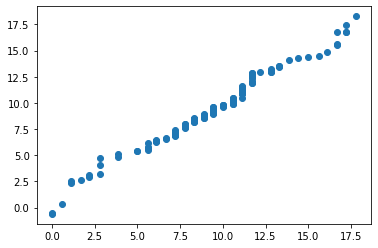

In [102]:
plt.scatter(np.sort(X), np.sort(beta_))